# **Dataset de renta de autos 🚓**
Swietenia Naomi Medina Gasca

Jueves 19 de junio de 2025

# Manejo de archivos de excel con python

In [ ]:
#importamos la biblioteca
import pandas as pd

#cargar el dataset subido de renta de autos
dfh=pd.read_excel('dataset_rentas_autos.xlsx', sheet_name='hechos_rentas_autos')
autos=pd.read_excel('dataset_rentas_autos.xlsx', sheet_name='dim_auto')

# Relación de tablas hechos - dimensión

In [ ]:
#unir las tablas por el id_auto
df_ventas=dfh.merge(autos, on='id_auto')
print(df_ventas)

#agrupar las ventas por los modelos
ventas_por_auto=df_ventas.groupby('modelo')['total_pago'].sum()

    id_renta  id_fecha id_auto id_cliente id_sucursal  días_renta  total_pago  \
0      R0001  20240630      A4       C049         S11           9       11250   
1      R0002  20240626      A1       C030         S10           6        7200   
2      R0003  20240629      A1       C028         S12           6        7200   
3      R0004  20240605      A4       C083         S11           5        6250   
4      R0005  20240624      A5       C069         S11          10       13500   
..       ...       ...     ...        ...         ...         ...         ...   
495    R0496  20240602      A3       C088         S10           2        2600   
496    R0497  20240615      A1       C016         S10           8        9600   
497    R0498  20240629      A2       C089         S10           5        6000   
498    R0499  20240609      A1       C084         S11           2        2400   
499    R0500  20240610      A1       C051         S12           4        4800   

     km_recorridos  seguro_

# Creando gráficas circulares

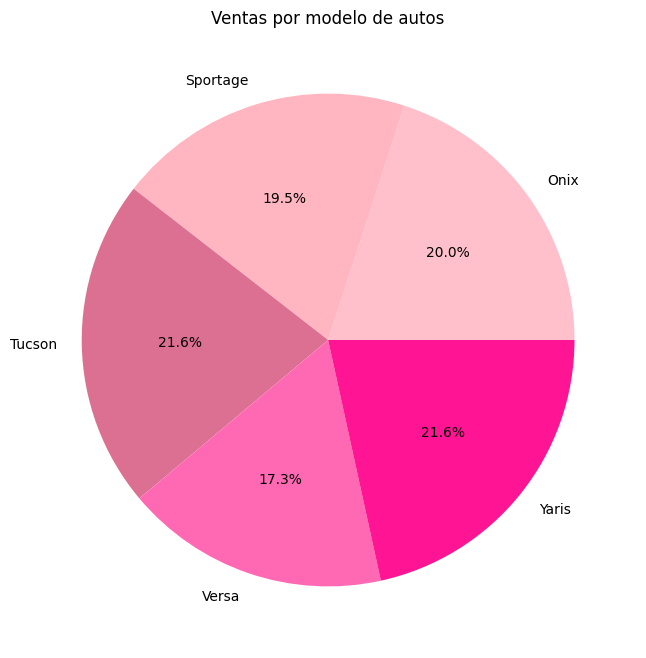

In [ ]:
import matplotlib.pyplot as plt

#gráfico circular
plt.figure(figsize=(8,8))
ventas_por_auto.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['pink', 'lightpink', 'palevioletred', 'hotpink', 'deeppink'])
plt.title('Ventas por modelo de autos')
plt.ylabel('')
plt.show()

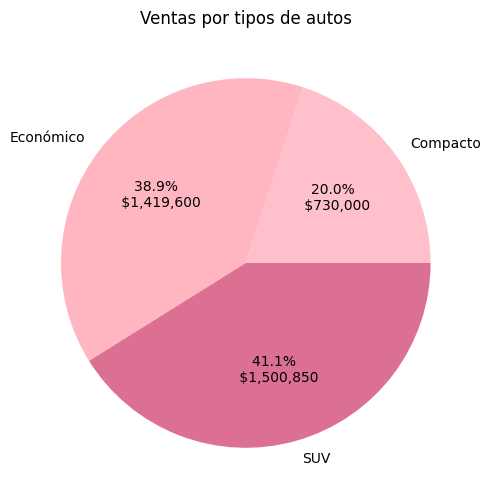

In [ ]:
#ventas por tipos de autos
#agrupar por tipos
ventas_por_tipo=df_ventas.groupby('tipo')['total_pago'].sum()

#metodo para mostrar monto y porcentaje
def formatear_Valores(pct,allvals):
  valor_absoluto=int(pct/100*sum(allvals))
  return f"{pct:.1f}% \n ${valor_absoluto:,}"

#graficar
plt.figure(figsize=(6,6))
plt.pie(
    ventas_por_tipo,
    labels=ventas_por_tipo.index,
    autopct=lambda pct: formatear_Valores(pct, ventas_por_tipo),
    colors=['pink', 'lightpink', 'palevioletred']
)
plt.title("Ventas por tipos de autos")
plt.show()

# Agregando sucursales

In [ ]:
#leyendo la hoja de sucursales
df_sucursales=pd.read_excel('dataset_rentas_autos.xlsx', sheet_name='dim_sucursal')
print(df_sucursales.columns)

Index(['id_sucursal', 'ciudad', 'estado'], dtype='object')


In [ ]:
#unir las ventas con la hoja de sucursales
df_ventas_sucursales=df_ventas.merge(df_sucursales,on='id_sucursal')
print(df_ventas_sucursales.columns)

Index(['id_renta', 'id_fecha', 'id_auto', 'id_cliente', 'id_sucursal',
       'días_renta', 'total_pago', 'km_recorridos', 'seguro_usado', 'marca',
       'modelo', 'tipo', 'tarifa_día', 'ciudad', 'estado'],
      dtype='object')


In [ ]:
ventas_por_sucursal=df_ventas_sucursales.groupby('ciudad')['total_pago'].sum()
print(ventas_por_sucursal)

ciudad
Cancún              1154150
Playa del Carmen    1105800
Tulum               1390500
Name: total_pago, dtype: int64


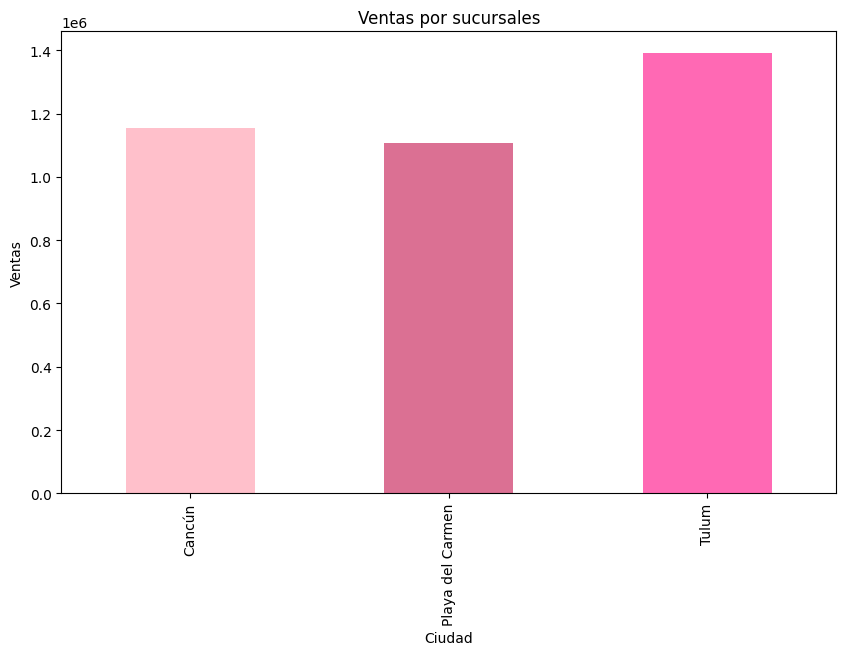

In [ ]:
#graficar
plt.figure(figsize=(10,6))
ventas_por_sucursal.plot(kind='bar', color=['pink', 'palevioletred', 'hotpink'])
plt.title('Ventas por sucursales')
plt.xlabel('Ciudad')
plt.ylabel('Ventas')
plt.show()

# Tipo de cliente y ventas


In [ ]:
#leyendo la hoja de clientes
df_clientes = pd.read_excel('dataset_rentas_autos.xlsx', sheet_name='dim_cliente')
display(df_clientes.columns)

Index(['id_cliente', 'nombre', 'país', 'edad'], dtype='object')

In [ ]:
#merge de ventas y clientes
df_ventas_sucursales_clientes = df_ventas_sucursales.merge(df_clientes, on='id_cliente')
display(df_ventas_sucursales_clientes.columns)

Index(['id_renta', 'id_fecha', 'id_auto', 'id_cliente', 'id_sucursal',
       'días_renta', 'total_pago', 'km_recorridos', 'seguro_usado', 'marca',
       'modelo', 'tipo', 'tarifa_día', 'ciudad', 'estado', 'nombre', 'país',
       'edad'],
      dtype='object')

In [ ]:
ventas_por_pais = df_ventas_sucursales_clientes.groupby('país')['total_pago'].sum()
display(ventas_por_pais)

,total_pago
país,
Albania,32150
Andorra,44650
Anguilla,57350
Antarctica (the territory South of 60 deg S),89700
Armenia,81050
...,...
United Kingdom,57600
Uzbekistan,31550
Vanuatu,7500


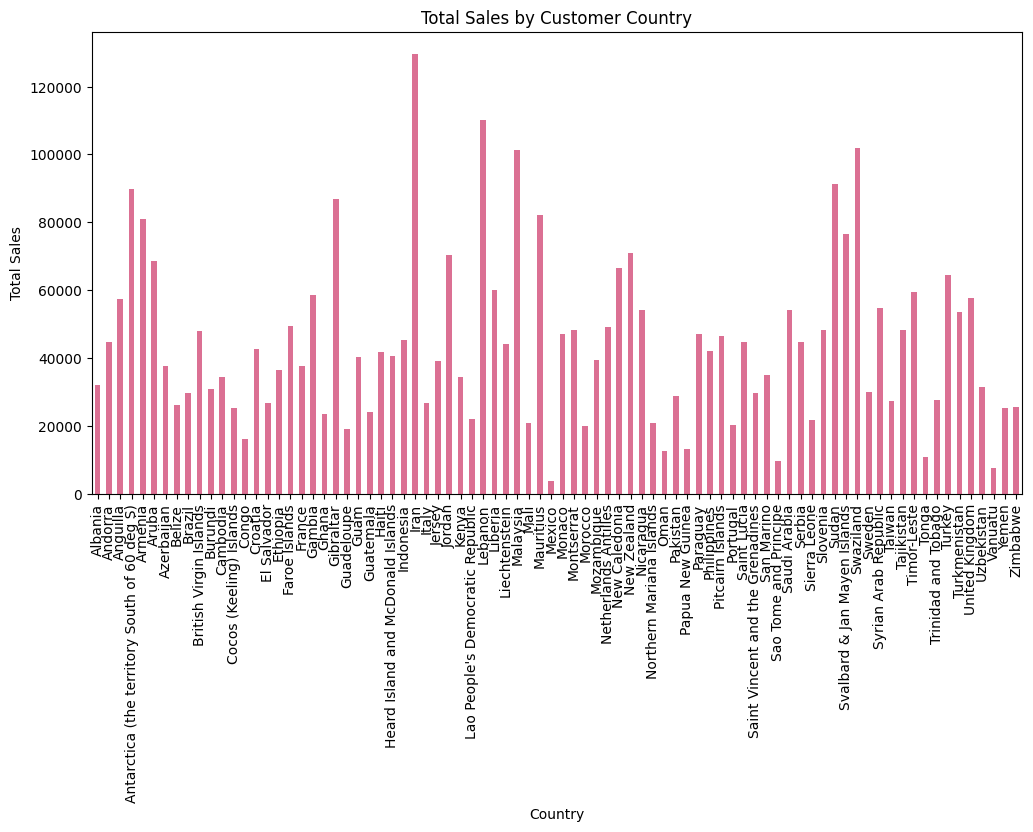

In [ ]:
#graficar
plt.figure(figsize=(12, 6))
ventas_por_pais.plot(kind='bar', color='palevioletred')
plt.title('Total Sales by Customer Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()